Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import seaborn as sns
import re,nltk,json, pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
path ='/content/drive/My Drive/Colab Notebooks/NLP Projects/Sentiment Analysis/' 
dataset_path ='/content/drive/My Drive/Colab Notebooks/' 
stopwords_list = path+'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
# Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
pip install bnlp_toolkit

     |████████████████████████████████| 23.9 MB 1.2 MB/s 
     |████████████████████████████████| 1.2 MB 49.1 MB/s 
     |████████████████████████████████| 743 kB 56.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
pip install wordcloud


# Importing Dataset

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/mdforhadcse/Bangla_Comments_Dataset/main/2000data.csv',encoding='UTF-8')
# data = pd.read_csv('https://raw.githubusercontent.com/mdforhadcse/Bangla_Comments_Dataset/main/Final.csv',encoding='UTF-8', index_col=0)
# data = pd.read_csv('https://raw.githubusercontent.com/mdforhadcse/Bangla_Comments_Dataset/main/NewLabeled2000.csv',encoding='UTF-8')
data

,No.,Social_acceptance,Comment
0,1,No,আবাল মার্কা সাংঘাতিক
1,2,No,ছাগল কোথাকার।
2,3,No,কোটার মাল
3,4,No,রেজিস্ট্রার একটা বলদের আতুরি।
4,5,No,"প্রতিবন্ধী কোটার রেজিস্ট্রার, মাইন্ড তো করবেই।"
...,...,...,...
1997,3997,Yes,জাযাকাল্লাহ খাইরান
1998,3998,Yes,অন্যায়ভাবে ভালো থাকা
1999,3999,Yes,বিত্তবানদের তো শুধু চাই আর চাই। চাবেই না বা কে...
2000,4000,Yes,অসাধারণ লেখা ভাই সাব।


In [ ]:
print("Total comments:",len(data),
      "\nTotal Social-accepted comments:",len(data[data.Social_acceptance == "Yes"]),
      "\nTotal Not Social-accepted comments:",len(data[data.Social_acceptance== "No"]))

Total comments: 2002 
Total Social-accepted comments: 1002 
Total Not Social-accepted comments: 1000


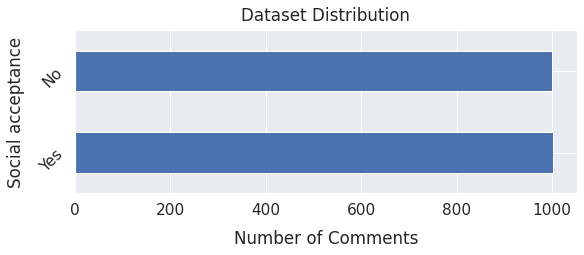

In [ ]:
sns.set(font_scale=1.4)
data['Social_acceptance'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Social acceptance", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
data.columns

Index(['No.', 'Social_acceptance', 'Comment'], dtype='object')

In [ ]:
# print some unprocessed Comments
sample_data = [10,100,150,200,250,600,650,666,689,640,650,700,750,800,1000]
for i in sample_data:
      print(data.Comment[i],'\n','Social_acceptance:-- ',data.Social_acceptance[i],'\n')

জ্বী ভাই।আপনাগো তালতো কি রুমে হিজরা নিয়ে গেসিলো?? সেটা কেনো এতো তড়ি ঘড়ি করে ছাপেন না।হেফাজত কে এতোদিন চাটছেন আপনাদের প্রশাসন। এখন হেফাজত দুর্গন্ধ ময় হয়ে গেলো।মাইয়া বাজ হয়ে গেলো! ফালতু পত্রিকা একটা। 
 Social_acceptance:--  No 

পাবলিক বিশব্বিদ্যালয় গুলো অযোগ্যদের দখলে এখন! 
 Social_acceptance:--  No 

সাহস সাফল্যের চাবি কাঠি 
 Social_acceptance:--  No 

লেন্ডি 
 Social_acceptance:--  No 

শালির ঘরের শালি 
 Social_acceptance:--  No 

বুরি হলে বুঝবি তুই এখন নয় । 
 Social_acceptance:--  No 

ভালো হয়ে যাও নোবেল!! 
 Social_acceptance:--  No 

আগে জানতাম ও দেখতাম মেয়েরা কমপিটিশন দিয়া ছেলেদের সাথে সব কিছুতে আগাইয়া জাইতাছে, এখন দেখি ছেলেরাও কমপিটিশন দিয়া মেয়েদের সাথে দিয়া পিংক কালার নিয়া আগাচ্ছে পিঙ্কির পিঙ্কু 
 Social_acceptance:--  No 

আমাদের বিচি শক্ত আমরা এনাম ভাইয়ের ভক্ত, 
 Social_acceptance:--  No 

চোর বেটা 
 Social_acceptance:--  No 

ভালো হয়ে যাও নোবেল!! 
 Social_acceptance:--  No 

আজকের গর্জন অনেক সুন্দর হয়েছে 
 Social_acceptance:--  No 

আবার বলাম মাহি ভালো হয়ে যাও 
 Social_accept

In [ ]:
from wordcloud import WordCloud
from bnlp.corpus import stopwords, punctuations

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
# Data cleaning function
def process_comments(Comment): 
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    text = re.sub('[%s]' % re.escape(punctuations), '', Comment)
    text = re.sub('\n', '', Comment)
    text = re.sub('\w*\d\w*', '', Comment)
    text = re.sub('\xa0', '', Comment)
    # stopwords removal
    stp = open(dataset_path+'bangla_stopwords.txt','r',encoding='utf-8').read().split()
    result = text.split()
    text = [word.strip() for word in result if word not in stp ]
    text =" ".join(text)
    return Comment


In [ ]:
# Apply the function into the dataframe
data['cleaned'] = data['Comment'].apply(process_comments)  
cleaned_text = data['cleaned'].apply(lambda x: process_comments(str(x)))

# print some cleaned Comments from the dataset
sample_data = [10,100,25,854,966,1500,1589,1700,2000]
for i in sample_data:
     print('Original:\n',data.Comment[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Social acceptance:-- ',data.Social_acceptance[i],'\n')

Original:
 জ্বী ভাই।আপনাগো তালতো কি রুমে হিজরা নিয়ে গেসিলো?? সেটা কেনো এতো তড়ি ঘড়ি করে ছাপেন না।হেফাজত কে এতোদিন চাটছেন আপনাদের প্রশাসন। এখন হেফাজত দুর্গন্ধ ময় হয়ে গেলো।মাইয়া বাজ হয়ে গেলো! ফালতু পত্রিকা একটা। 
Cleaned:
 জ্বী ভাই আপনাগো তালতো কি রুমে হিজরা নিয়ে গেসিলো   সেটা কেনো এতো তড়ি ঘড়ি করে ছাপেন না হেফাজত কে এতোদিন চাটছেন আপনাদের প্রশাসন  এখন হেফাজত দুর্গন্ধ ময় হয়ে গেলো মাইয়া বাজ হয়ে গেলো  ফালতু পত্রিকা একটা  
 Social acceptance:--  No 

Original:
 পাবলিক বিশব্বিদ্যালয় গুলো অযোগ্যদের দখলে এখন! 
Cleaned:
 পাবলিক বিশব্বিদ্যালয় গুলো অযোগ্যদের দখলে এখন  
 Social acceptance:--  No 

Original:
 তথ্যসন্ত্রাসী এরা এটা সবাই জানে 
Cleaned:
 তথ্যসন্ত্রাসী এরা এটা সবাই জানে 
 Social acceptance:--  No 

Original:
 সোদে চাটনি বেকার খাটনি 
Cleaned:
 সোদে চাটনি বেকার খাটনি 
 Social acceptance:--  No 

Original:
 আপনার জাম্বুরা অনেক বড় 
Cleaned:
 আপনার জাম্বুরা অনেক বড় 
 Social acceptance:--  No 

Original:
 আজরাইল এতো মাইনসেরে মারেতোরে চোখে দেখেনা? 
Cleaned:
 আজরাইল এতো মাইনসেরে মারেতোরে চোখে দ

In [ ]:
stp = open(dataset_path+'bangla_stopwords.pkl','rb')
stp = pickle.load(stp)
len(stp)

398

In [ ]:
# Stopwords pickle 
stp = open(dataset_path+'bangla_stopwords.txt','r',encoding='utf-8').read().split()
# open a file, where you ant to store the data
file = open(dataset_path+'bangla_stopwords.pkl', 'wb')
# dump information to that file
pickle.dump(stp, file)

In [ ]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the Comments with least words
dataset = data.loc[data.length>1]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Comments".format(len(data)-len(dataset)),
      "\nTotal Comments:",len(dataset))

After Cleaning: 
Removed 60 Small Comments 
Total Comments: 1942


In [ ]:
# Save the Cleaned data for reuse
dataset.to_csv(dataset_path+'cleaned_final.csv')
dataset.columns

Index(['No.', 'Social_acceptance', 'Comment', 'cleaned', 'length'], dtype='object')

In [ ]:
def data_summary(dataset):
    
    """
    This function will print the summary of the Comments and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Social_acceptance.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Social_acceptance==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Social_acceptance==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Social_acceptance==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  Yes
Number of Documents:977
Number of Words:18559
Number of Unique Words:5343
Most Frequent Words:

না	260
আপনার	182
করে	181
এই	170
ও	132
আমার	120
আমাদের	117
আর	116
কি	113
জন্য	113

Class Name :  No
Number of Documents:965
Number of Words:10530
Number of Unique Words:4145
Most Frequent Words:

না	213
করে	102
এই	90
কি	88
আর	81
ভাই	64
তো	62
একটা	59
তোমার	58
ভালো	57
Total Number of Unique Words:7932


Dataset Summary Visualization

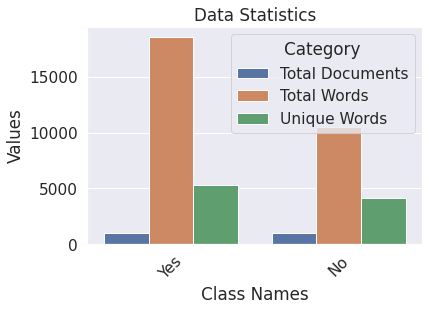

In [ ]:
 data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
data_matrix

,Total Documents,Total Words,Unique Words,Class Names
0,977,18559,5343,Yes
1,965,10530,4145,No


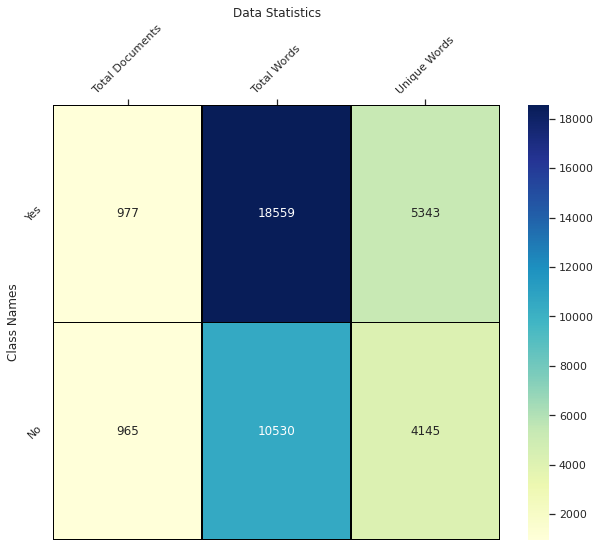

In [ ]:
sns.set()
plt.figure(figsize =(10, 8))
ax = plt.subplot()
sns.heatmap(data_matrix.iloc[:,0:3], annot=True,fmt="d", linewidths=0.5,linecolor = 'Black',cmap = "YlGnBu",ax = ax)
# labels, title and ticks
ax.set_ylabel('Class Names') 
ax.set_title('Data Statistics')
y_label = ["Total Documents", "Total Words", "Unique Words"] 
ax.xaxis.set_ticklabels(y_label, rotation=45); ax.yaxis.set_ticklabels(class_names, rotation=45);
ax.xaxis.tick_top()

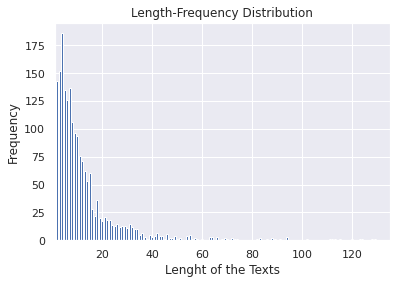

Maximum Length of a Comment: 542
Minimum Length of a Comment: 2
Average Length of a Comments: 15.0


In [ ]:
# Calculate the Comment of each of the Comment
dataset['CommentLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.CommentLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Comment: {max(dataset.CommentLength)}")
print(f"Minimum Length of a Comment: {min(dataset.CommentLength)}")
print(f"Average Length of a Comments: {round(np.mean(dataset.CommentLength),0)}")

In [ ]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf
!wget https://www.omicronlab.com/download/fonts/Nikosh.ttf
!wget https://www.omicronlab.com/download/fonts/Siyam%20Rupali%20ANSI.ttf

--2021-12-26 09:11:00--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.104.46.32
Connecting to www.omicronlab.com (www.omicronlab.com)|172.104.46.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314592 (307K) [application/octet-stream]
Saving to: ‘kalpurush.ttf’

kalpurush.ttf       100%[===================>] 307.22K   604KB/s    in 0.5s    

2021-12-26 09:11:02 (604 KB/s) - ‘kalpurush.ttf’ saved [314592/314592]

--2021-12-26 09:11:02--  https://www.omicronlab.com/download/fonts/Nikosh.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.104.46.32
Connecting to www.omicronlab.com (www.omicronlab.com)|172.104.46.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 795992 (777K) [application/octet-stream]
Saving to: ‘Nikosh.ttf’

Nikosh.ttf          100%[===================>] 777.34K   912KB/s    in 0.9s    

2021-12-26 09:11:04 (912 KB/s) - ‘Nikosh.ttf’ saved [7

In [ ]:
refined_sentence = " ".join(cleaned_text)

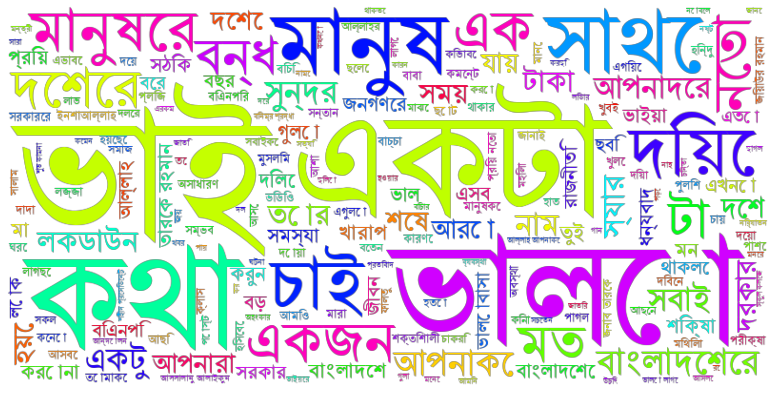

In [ ]:
regex = r"[\u0980-\u09FF]+"
wc = WordCloud(width=800, height=400,mode="RGBA",background_color=None,colormap="hsv",stopwords = stopwords,
font_path="Nikosh.ttf",regexp=regex).generate(refined_sentence)
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
result = wc.to_file("Bengali_word_cloud.png")

Model Building

In [ ]:
accepted = dataset[dataset.Social_acceptance == "Yes"]                  
not_accepted = dataset[dataset.Social_acceptance == "No"]
dataset = accepted.append(not_accepted,ignore_index=True)
dataset.Social_acceptance.value_counts()

Yes    977
No     965
Name: Social_acceptance, dtype: int64

In [ ]:
#==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(dataset,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(dataset.Social_acceptance)
    encoded_labels = le.transform(dataset.Social_acceptance)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print(color.BOLD+"\n\t\t\t===== Label Encoding ====="+color.END,"\nClass Names:-->",le.classes_)
    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(feature_space,Social_acceptance):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X,X_test,y,y_test = train_test_split(feature_space,Social_acceptance,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0],
        "\n\tValidation\t\t",X_valid.shape[0])
  
    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [ ]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

# Tokenizer

In [ ]:
def encoded_texts(dataset,padding_length,max_words):

  '''
  This function will encoded the text into a sequence of numbers

  Args:
  dataset: a dataset
  padding_length: maximum length of a encoded texte
  max_words : Number of words 

  returns:
  corpus: Number of encoded texts
  labels: encoded labels
  '''
  
  tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)
  
 

 # Fit the tokenizer
  tokenizer.fit_on_texts(dataset.cleaned)
  #============================== Tokenizer Info =================================
  (word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
  def tokenizer_info(mylist,bool):
    ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
    for w,c in ordered[:10]:
      print(w,"\t",c)
  #=============================== Print all the information =========================
  print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)   
  print("Words --> Counts:")
  tokenizer_info(word_counts,bool =True )
  print("\nWords --> Documents:")
  tokenizer_info(word_docs,bool =True )
  print("\nWords --> Index:")
  tokenizer_info(word_index,bool =True )    
  print("\nTotal Documents -->",document_count)

  #=========================== Convert string into list of integer indices =================
  sequences = tokenizer.texts_to_sequences(dataset.cleaned)
  word_index = tokenizer.word_index
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\nFound {} unique tokens".format(len(word_index)))  
  print(dataset.cleaned[10],"\n",sequences[10]) 

  #==================================== Pad Sequences ============================== 
  corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0,
                                                      padding='post', maxlen= padding_length)
  print("\n\t\t\t====== Paded Sequences ======\n",dataset.cleaned[10],"\n",corpus[10])   

  #=================================     Label Encoding ================================
  labels = label_encoding(dataset,True)

   # save the tokenizer into a pickle file
  with open(path+'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

  return corpus,labels
  
#call the function
num_words = 5000
corpus,labels = encoded_texts(dataset,
                                300,num_words)
print("\nShape of Encoded Corpus =====>",corpus.shape)

			====== Tokenizer Info ======
Words --> Counts:
না 	 473
করে 	 283
এই 	 260
আপনার 	 222
কি 	 201
আর 	 197
ভাই 	 176
আমার 	 175
ও 	 164
আমি 	 155

Words --> Documents:
না 	 321
করে 	 184
এই 	 184
আপনার 	 176
কি 	 165
আর 	 156
ভাই 	 147
জন্য 	 128
ও 	 126
আমার 	 123

Words --> Index:
দুও 	 7933
নিসেআসে 	 7932
লুংগির 	 7931
শুয়ে 	 7930
আটলানটিকের 	 7929
দাদার 	 7928
মেষ 	 7927
ছাড়লেন 	 7926
দাদারেও 	 7925
ফাজিল 	 7924

Total Documents --> 1942

			====== Encoded Sequences ====== 
Found 7933 unique tokens
হারামজাদাগুলা এত বেকুব কেরে   বেআক্কেলের মত বাহির হইয়া কান ধরলো ক্যা 
 [3065, 149, 3066, 3067, 3068, 63, 1413, 1938, 1088, 3069, 1939]

			====== Paded Sequences ======
 হারামজাদাগুলা এত বেকুব কেরে   বেআক্কেলের মত বাহির হইয়া কান ধরলো ক্যা 
 [3065  149 3066 3067 3068   63 1413 1938 1088 3069 1939    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0  

Model Building Using Machine Learning Feature Extraction Using TF-IDF

In [ ]:
#======================================
                                            ##### Unigram Tf-idf value calculation
                                            #======================================
            
def calc_gram_tfidf(Comments,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        Comments: a list of cleaned Comments   
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(Comments)
    
    return tfidf,X

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
#============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination(): 
    """
    This function consists the models defination for All gram Features
    
    Retuns:
        ml_models: list of models
        model_names: list of model_names
    
    """
    
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.
    
    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
        
    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100 
    
    return my_dict  

                                        #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================
            
def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.
    
    Args:
        performance_dict: a dictionary of all the parameters for each models
        
    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

Model Training

In [ ]:
## save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset,False)
    X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy, f)

Feature Size :======> 7932

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1942 
	Training		 1397 
	Test			 195 
	Validation		 350
Feature Size :======> 31024

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1942 
	Training		 1397 
	Test			 195 
	Validation		 350
Feature Size :======> 55267

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1942 
	Training		 1397 
	Test			 195 
	Validation		 350


In [ ]:
# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     74.36      78.49   70.87     74.49          LR
1     61.03      66.67   52.43     58.70          DT
2     71.28      80.52   60.19     68.89          RF
3     80.51      81.55   81.55     81.55         MNB
4     68.21      68.47   73.79     71.03         KNN
5     70.26      89.47   49.51     63.75  Linear SVM
6     69.23      83.08   52.43     64.29     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by MNB at = 80.51
Highest F1-Score achieved by MNB at = 81.55
Highest Precision Score achieved by Linear SVM at = 89.47
Highest Recall Score achieved by MNB at = 81.55

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     74.87      78.72   71.84     75.13          LR
1     64.10      70.89   54.37     61.54          DT
2     68.21      87.27   46.60     60.76          RF
3     7

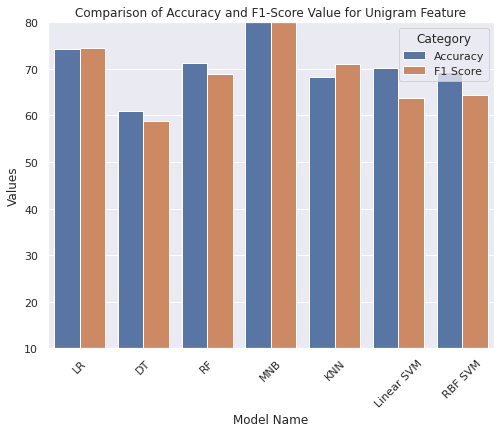

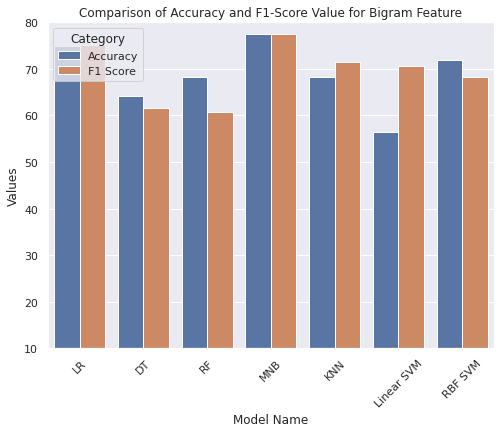

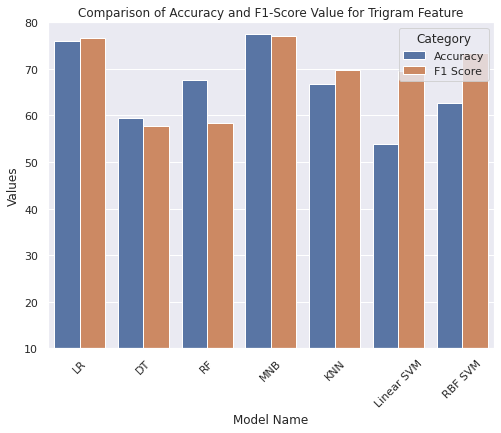

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);

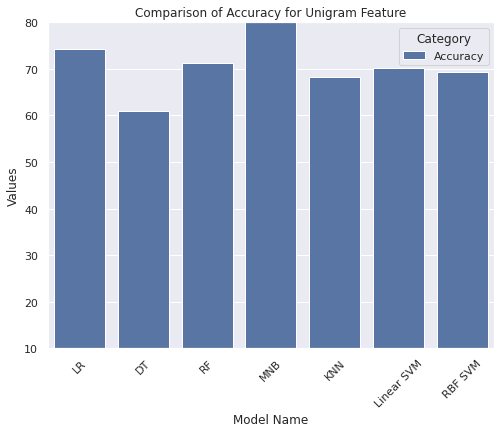

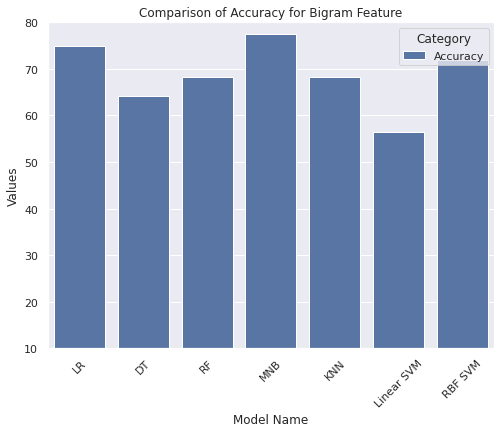

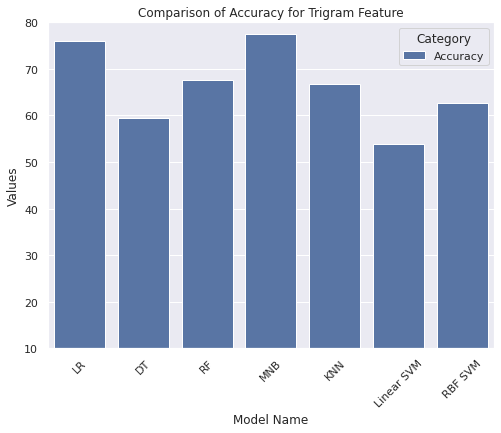

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);

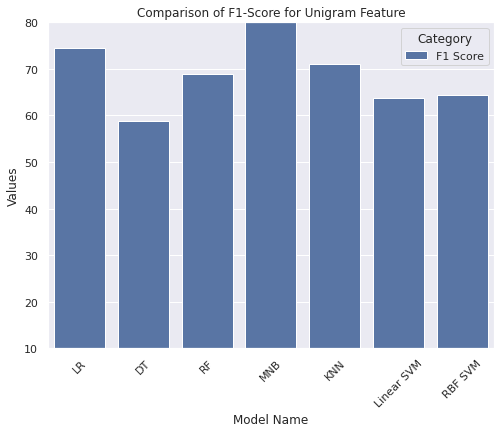

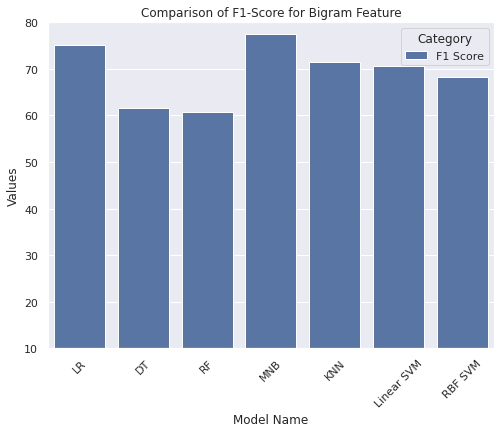

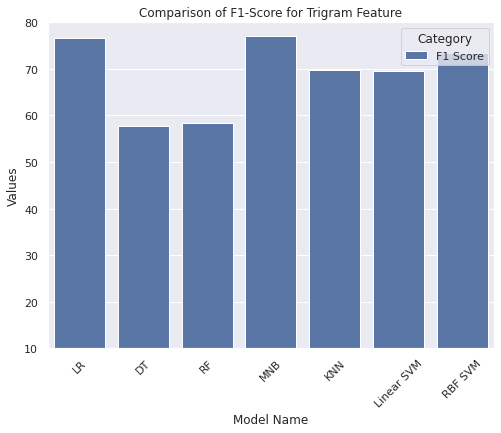

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of F1-Score for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);

In [ ]:
# X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(corpus,labels)

In [ ]:
# embedding_dimension = 128
# input_length = 300
# vocab_size = 5000
# num_classes = 12
# batch_size = 64
# num_epochs = 10

# accuracy_threshold = 0.97


# class myCallback(keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#       if(logs.get('accuracy')>accuracy_threshold):
#         print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
#         self.model.stop_training = True

# acc_callback = myCallback()
# # Saved the Best Model
# filepath = path+"Model.h5"
# checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
#                                              save_weights_only=False, mode='max')
# # callback list
# callback_list = [acc_callback, checkpoint] 

#                             ###############################     CNN network architecture ################
# model = tf.keras.models.Sequential([
# tf.keras.layers.Embedding(vocab_size, embedding_dimension, input_length = input_length),
# tf.keras.layers.Conv1D(128, 5, activation= 'relu'),
# tf.keras.layers.MaxPooling1D(5),
# tf.keras.layers.Bidirectional(LSTM(64, return_sequences=True,dropout = 0.2)),
# tf.keras.layers.Bidirectional(LSTM(64, return_sequences=True,dropout = 0.2)),
# tf.keras.layers.Dense(28, activation='relu'),
# tf.keras.layers.Dense(14, activation='relu'),
# keras.layers.Flatten(),
# tf.keras.layers.Dense(num_classes , activation='softmax')])

# model.summary()

# model.compile(optimizer=keras.optimizers.Adam(),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy'])
   
# history = model.fit(X_train,
#     y_train,
#     epochs=num_epochs,
#     batch_size = batch_size,
#     validation_data=(X_valid, y_valid),
#     verbose =1)
#     #callbacks = callback_list)

In [ ]:
# # save the model
# tf.keras.models.save_model(model, path+'Document.h5', save_format='h5')
# #model.save(path+'Document_Categorization.h5')

In [ ]:

# loss_values = history.history['loss']
# val_loss_values = history.history['val_loss']
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# epochs = range(1, len(acc) + 1)
# sns.set_style('darkgrid')
#                   #=========================================================
#                   ############### Epochs vs Validation Accuracy Plot ##########
#                   #==========================================================

# plt.plot(epochs, acc, color='midnightblue', linewidth = 2, 
#           marker='o', markersize=8,label='Training Accuracy')
# plt.plot(epochs, val_acc, color='darkred', linewidth = 2, 
#           marker='o', markersize=8,label='Training Accuracy')
# plt.title('Training and validation accuracy',fontsize=12,fontweight='bold')
# plt.xlabel('Epochs',fontsize=12,fontweight='bold')
# plt.ylabel('Accuracy',fontsize=12,fontweight='bold')
# plt.legend(['Training Accuracy','Validation Accuracy'])

In [ ]:
# class_names = ['Yes' ,'No']
# predictions = model.predict(X_test)
# y_pred = np.argmax(predictions, axis=1)
# report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred, output_dict=True)).transpose()
# report = report.rename(index={'0': 'No','1':'Yes'})
# report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
# report

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix
# predictions = model.predict(X_test)
# y_pred = np.argmax(predictions, axis=1)

# cm = confusion_matrix(y_test, y_pred) 

# class_names = ['Yes' ,'No']
# # Transform to df for easier plotting
# cm_df = pd.DataFrame(cm,
#                      index = class_names, 
#                      columns = class_names)

# plt.figure(figsize=(8,6))
# sns.heatmap(cm_df, annot=True,cmap="Greens", fmt='g')
# plt.title('CNN-BiLSTM \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)*100))
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.xticks(rotation = 45)
# plt.yticks(rotation = 45)
# plt.show()

In [ ]:

# sample_news = 'আমি এর তিব্র নিন্দা জানাচ্ছি'
# cleaned_comments = process_comments(sample_news)

# class_names = ['Yes' ,'No']

# #print(cleaned_news)
# # load the saved tokenizer
# with open(path+'tokenizer.pickle', 'rb') as handle:
#     loaded_tokenizer = pickle.load(handle)
# #print(len(loaded_tokenizer.word_index))
# seq= loaded_tokenizer.texts_to_sequences([cleaned_comments])
# padded = pad_sequences(seq, value=0.0,padding='post', maxlen= 300 )
# pred = model.predict(padded)
# #print(pred) 
# class_names[np.argmax(pred)]